# BAL Templates

The purpose of this notebook is to demonstrate how to include BALs into QSO templates.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from desisim.io import read_basis_templates
from desisim.templates import QSO, SIMQSO
from desisim.bal import BAL

In [3]:
%matplotlib inline

In [4]:
seed = 555
rand = np.random.RandomState(seed)

#### Plot a random subset of the BAL templates.

In [5]:
nplot = 5

In [6]:
balflux, balwave, balmeta = read_basis_templates('BAL')

INFO:io.py:895:read_basis_templates: Reading /Users/ioannis/work/desi/spectro/templates/basis_templates/v2.6/bal_templates_v2.0.fits


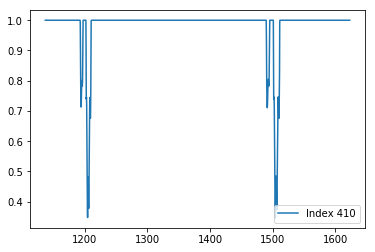

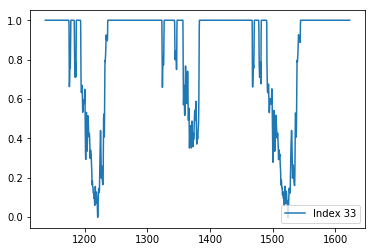

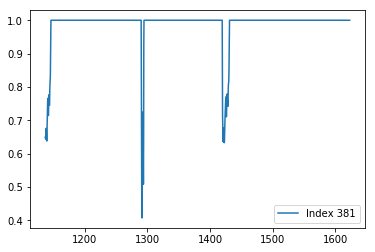

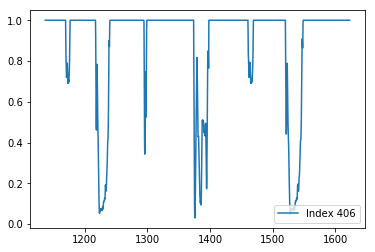

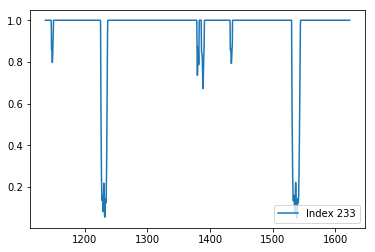

In [7]:
these = rand.choice(len(balmeta), nplot)
for ii in these:
    plt.plot(balwave, balflux[ii, :], label='Index {}'.format(ii))
    plt.legend(loc='lower right')
    plt.show()

#### Build example QSO spectra with and without BALs.

In [8]:
nmodel = 10
zrange = (1.8, 3.0)

In [9]:
qso = QSO()
flux, wave, meta = qso.make_templates(nmodel, seed=seed, zrange=zrange, 
                                      lyaforest=False, nocolorcuts=True)
meta

OBJTYPE,SUBTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
,,,,,,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,Dex,Dex,Dex,Dex,,Gyr,K,m / s2,
str10,str10,int64,int64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
QSO,,0,3083073946,1.9712143392339654,21.361172,2.3314848,2.8545084,4.6136193,48.24603,90.68837,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,1,1299452590,2.935103017148972,20.102987,7.6514993,9.09505,9.385255,28.528181,122.165985,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,2,205536233,2.2079887039544834,21.170416,7.306494,3.4027781,10.201743,30.762573,237.674,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,3,707945505,2.54452254979902,22.221867,1.4564753,1.2919728,2.2432866,12.217432,31.441158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,4,4056476228,2.3435515733142998,21.190647,3.4704437,3.3399591,5.266035,49.51687,164.44705,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,5,4261911933,2.0877209035210695,21.031223,3.6002588,3.8682158,8.246492,83.02113,178.89035,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,6,2947979814,1.8414055091041888,21.540266,2.1448345,2.420436,2.8631344,37.480366,70.45209,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,7,2027234710,1.9783117355943411,20.803541,3.672509,4.7707157,5.8674765,111.29061,232.06288,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [10]:
qso_bal = QSO(balqso=True)
flux_bal, _, meta_bal = qso_bal.make_templates(nmodel, seed=seed, balprob=1, zrange=zrange, 
                                               lyaforest=False, nocolorcuts=True)
meta_bal

INFO:io.py:895:read_basis_templates: Reading /Users/ioannis/work/desi/spectro/templates/basis_templates/v2.6/bal_templates_v2.0.fits


OBJTYPE,SUBTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
,,,,,,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,Dex,Dex,Dex,Dex,,Gyr,K,m / s2,
str10,str10,int64,int64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
QSO,BAL,0,3083073946,1.9712143392339654,21.361172,2.2520273,2.8545084,3.4786017,42.481014,79.711815,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,BAL,1,1299452590,2.935103017148972,20.102987,9.195173,9.09505,14.792039,71.00738,167.19891,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,BAL,2,205536233,2.2079887039544834,21.170416,3.4514606,3.4027781,4.7302375,52.4169,146.18277,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,BAL,3,707945505,2.54452254979902,22.221867,1.1584877,1.2919728,1.3507257,3.589626,21.92136,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,BAL,4,4056476228,2.3435515733142998,21.190647,3.608404,3.3399591,3.8134224,31.952965,127.547356,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,BAL,5,4261911933,2.0877209035210695,21.031223,3.5491307,3.8682158,4.505684,75.91279,177.0667,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,BAL,6,2947979814,1.8414055091041888,21.540266,2.3006382,2.420436,2.845083,64.330414,126.95421,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,BAL,7,2027234710,1.9783117355943411,20.803541,4.1736426,4.7707157,5.2706847,95.959435,195.50069,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


#### Not sure why the templates are not reproducible...

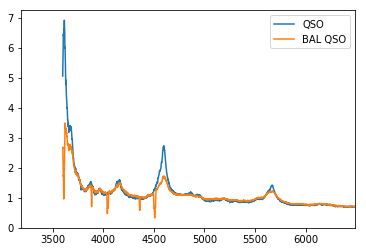

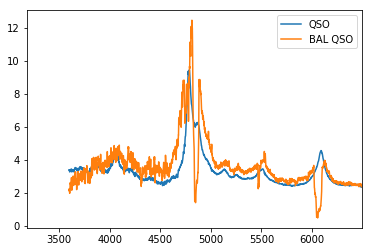

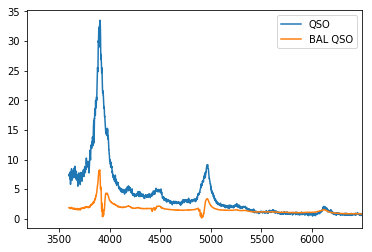

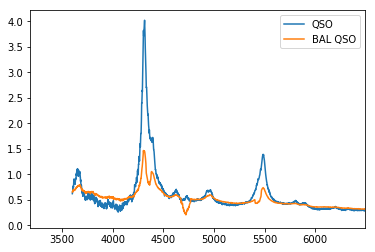

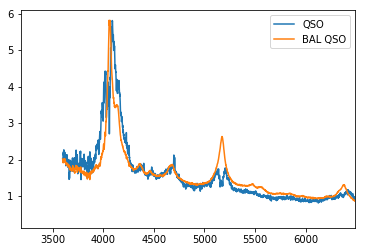

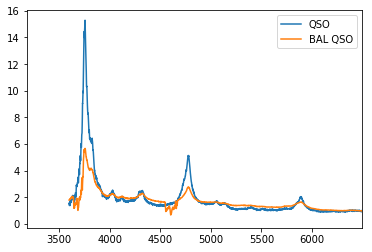

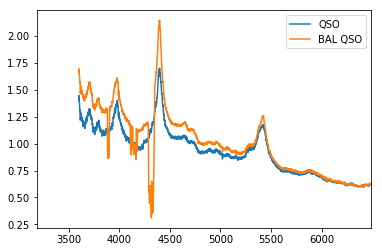

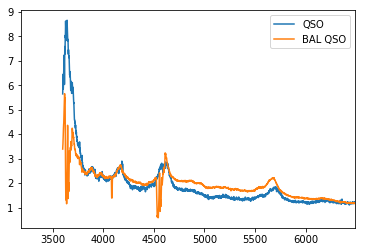

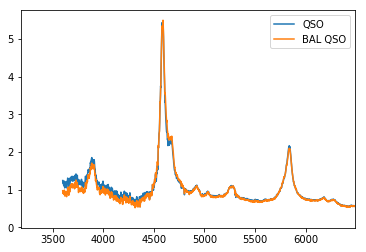

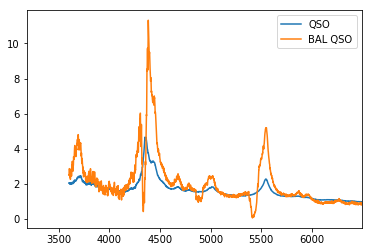

In [11]:
for ii in range(nmodel):
    plt.plot(wave, flux[ii, :], label='QSO')
    plt.plot(wave, flux_bal[ii, :], label='BAL QSO')
    plt.xlim(balwave.min()*(1+zrange[0]), balwave.max()*(1+zrange[1]))
    plt.legend(loc='upper right')
    plt.show()

### What about adding BALs separately (e.g., as part of quickquasars)?

Instead of using the BAL code in *desisim.templates* itself, one can easily include BALs separately.  Here, we demonstrate how to do so using the `SIMQSO` class to build QSO spectra.

In [12]:
nsimmodel = 20
simqq = SIMQSO()
simflux, simwave, simmeta = simqq.make_templates(nsimmodel, zrange=(1.8, 3), seed=seed,
                                                 nocolorcuts=True, lyaforest=False)
simmeta

OBJTYPE,SUBTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
,,,,,mag,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,Dex,Dex,Dex,Dex,,Gyr,K,m / s2,
str10,str10,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
QSO,,0,3083073946,2.0877209,21.765457,1.9524748,1.9670564,2.8990946,4.943346,8.880149,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,1,3083073946,1.8414055,19.38859,18.782274,17.56159,19.528723,38.809055,84.24881,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,2,3083073946,1.9783118,19.483347,18.249746,16.093887,17.135021,28.534199,41.578354,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,3,3083073946,2.7730393,20.481674,6.3124743,6.4169726,6.9685493,9.055152,13.342611,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,4,3083073946,2.5837264,21.510948,2.8602004,2.4866843,2.6747077,2.7282217,3.905749,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,5,3083073946,2.4533625,20.0494,11.854356,9.555195,11.268078,12.396798,19.639875,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,6,3083073946,1.8494337,22.63588,0.91181505,0.88236505,1.1043581,2.4530907,4.6772423,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,7,3083073946,2.3617995,20.732468,6.247119,5.0934596,6.1159253,7.2774262,10.5539,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [13]:
bal = BAL()
simflux_bal, balmeta = bal.insert_bals(simwave, simflux, simmeta['REDSHIFT'], balprob=0.5, seed=seed)
balmeta

INFO:io.py:895:read_basis_templates: Reading /Users/ioannis/work/desi/spectro/templates/basis_templates/v2.6/bal_templates_v2.0.fits


TEMPLATEID,REDSHIFT
int32,float32
-1,2.0877209
209,1.8414055
-1,1.9783118
-1,2.7730393
-1,2.5837264
260,2.4533625
-1,1.8494337
105,2.3617995
-1,2.866496


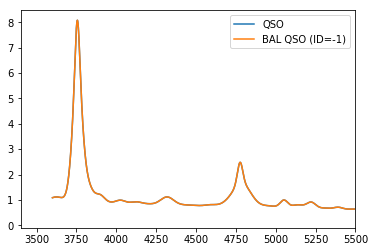

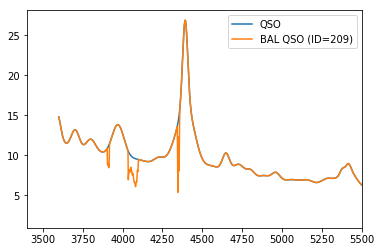

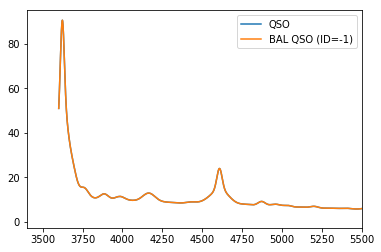

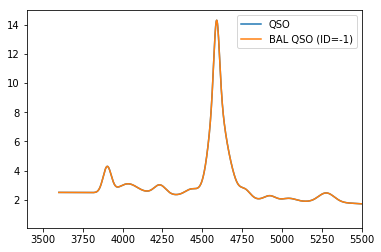

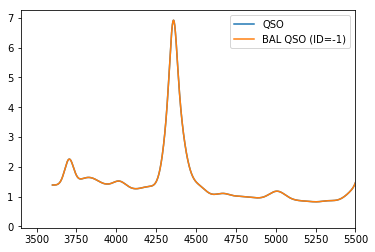

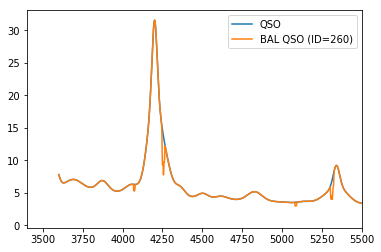

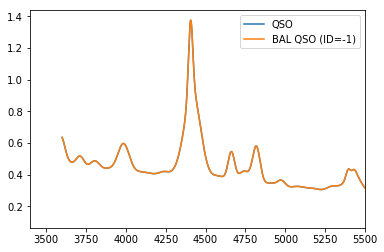

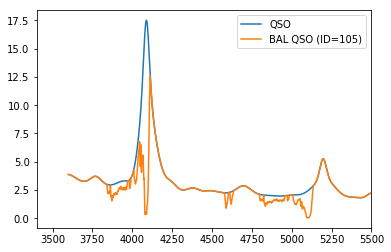

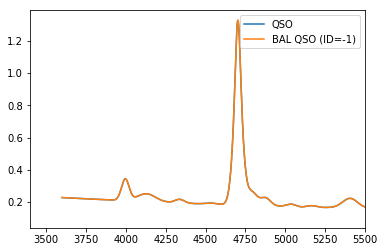

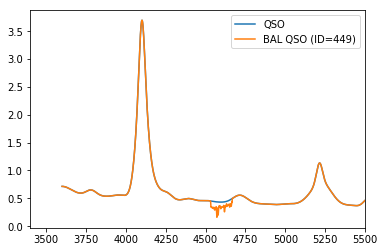

In [14]:
for ii in range(nmodel):
    plt.plot(simwave, simflux[ii, :], label='QSO')
    plt.plot(simwave, simflux_bal[ii, :], label='BAL QSO (ID={})'.format(balmeta['TEMPLATEID'][ii]))
    plt.xlim(3400, 5500)
    plt.legend(loc='upper right')
    plt.show()